In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData(datadir = "/data_latest/")

## Collect Data

In [3]:
analyzer.copy_data_from_directory("/data_unity/")

## Basic statistics

In [4]:
df = analyzer.get_data()

In [5]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,400.0,0.000000,-828.864593,-828.864593,104.251811,9.601777,8.528313,0.210000,0.0,...,1,5,5,9,36.147627,-14.291794,0.514305,0.482037,0.023924,0.009459
1,100,400.0,-0.148727,-821.349255,-821.232445,-10.248539,9.601777,8.528313,0.196510,2.0,...,1,5,5,9,4.481010,11.333628,0.514305,0.482037,0.030169,-0.076305
2,200,400.0,0.000000,-835.206890,-835.206890,-56.045550,9.601777,8.528313,0.201294,4.0,...,1,5,5,9,10.478896,26.503825,0.514305,0.482037,0.012901,-0.032630
3,300,400.0,-0.688385,-803.091260,-802.550604,49.526606,9.601777,8.528313,0.201287,5.0,...,1,5,5,9,24.914792,-9.850635,0.514305,0.482037,0.034711,0.013724
4,400,400.0,1.181674,-802.410507,-803.338591,147.341176,9.601777,8.528313,0.201122,7.0,...,1,5,5,9,42.973434,-16.990534,0.514305,0.482037,0.020124,0.007957


In [6]:
df["itheta"].unique()

array([0.785398, 1.570796, 0.392699, 3.141593, 1.178097, 1.963495,
       2.356194, 0.      , 2.748894, 3.534292])

In [7]:
df_stats = analyzer.do_stats(therm = 0)

In [8]:
df_stats.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,10.0,0.000000,1.6,10000.0,1000.0,100.0,100.0,0.034202,-204.885439,-204.885439,...,0.009147,2.925980,3.049152,0.0,0.0,0.087460,0.215978,375.0,6.250000,0.104167
1,10.0,0.000000,1.6,10000.0,4000.0,100.0,100.0,0.021717,-205.062766,-205.062766,...,0.002524,4.821024,2.227360,0.0,0.0,0.025255,0.174023,166.0,2.766667,0.046111
2,10.0,0.392699,1.6,10000.0,1000.0,100.0,100.0,0.009802,-208.408625,-208.412474,...,0.001446,3.680436,1.289105,0.0,0.0,0.030408,0.048396,41.0,0.683333,0.011389
3,10.0,0.392699,1.6,10000.0,4000.0,100.0,100.0,0.022388,-207.874121,-207.882913,...,0.004237,2.819576,1.146101,0.0,0.0,0.046357,0.046491,33.0,0.550000,0.009167
4,10.0,0.785398,1.6,10000.0,1000.0,100.0,100.0,0.025667,-206.899562,-206.919720,...,0.003180,3.905533,1.060966,0.0,0.0,0.036599,0.010320,46.0,0.766667,0.012778


# Observable quick plots (seaborn)

### Q_L

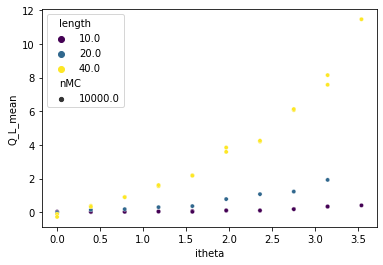

In [9]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### S_L

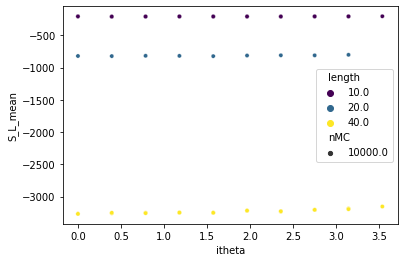

In [10]:
sns.scatterplot(data = df_stats, x = "itheta", y = "S_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### Xi_L

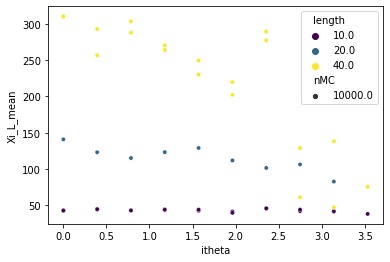

In [11]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Xi_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### F_L Re

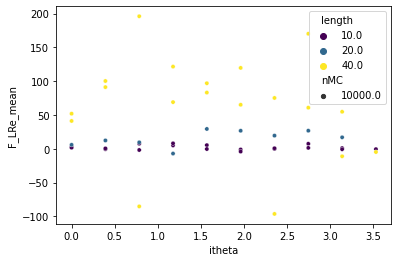

In [12]:
sns.scatterplot(data = df_stats, x = "itheta", y = "F_LRe_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

In [13]:
F_L_Re_df = df_stats.filter(["F_LRe_mean","F_Re_py_mean"])
F_L_Re_df.rename(columns = {"F_LRe_mean":"C++","F_Re_py_mean":"Python"},inplace = True)
F_L_Re_df.columns.name = 'Source'
F_L_Im_df = df_stats.filter(["F_LIm_mean","F_Im_py_mean"])
F_L_Im_df.rename(columns = {"F_LIm_mean":"C++","F_Im_py_mean":"Python"},inplace = True)
F_L_Im_df.columns.name = 'Source'
F_L_Re_df = F_L_Re_df.stack()
F_L_Im_df = F_L_Im_df.stack()
F_L_Re_df.name = "F_L"
F_L_Re_df = F_L_Re_df.to_frame()
F_L_Im_df.name = "F_L"
F_L_Im_df = F_L_Im_df.to_frame()
F_L_Im_df.head()

F_L
  Source           
0 C++    -11.888492
  Python  -0.652329
1 C++     -1.665910
  Python  -0.041470
2 C++      4.276123

In [14]:
F_L_df = F_L_Re_df.join(F_L_Im_df, lsuffix = "_Re", rsuffix = "_Im")

In [15]:
F_L_df.head()

F_L_Re     F_L_Im
  Source                     
0 C++     2.613301 -11.888492
  Python  0.572698  -0.652329
1 C++     1.719689  -1.665910
  Python  0.490906  -0.041470
2 C++    -0.519629   4.276123

## Correlation Length

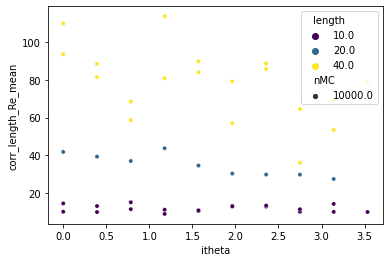

In [16]:
sns.scatterplot(data = df_stats, x = "itheta", y = "corr_length_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

### Mass Gap

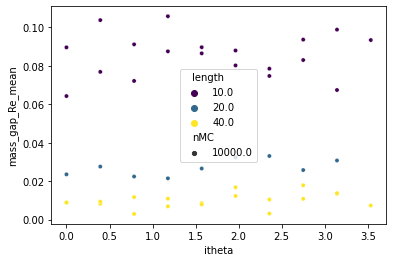

In [17]:
sns.scatterplot(data = df_stats, x = "itheta", y = "mass_gap_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

# Observable detailed plots with error (matplotlib)

In [22]:
lengths = df_stats["length"].unique()
lengths = [10,40]
colors = sns.color_palette("Blues", len(lengths))
observable = "Q_L"

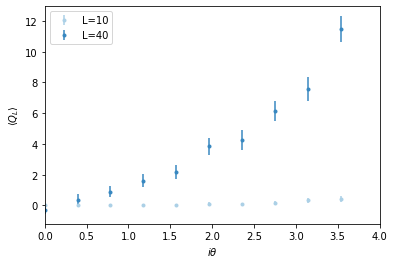

In [23]:
for n,length in enumerate(lengths):
    x,y,err = analyzer.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 4000, freq = 100)
    plt.errorbar(x, y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.xlim([0.0,4.0])
plt.xlabel(r"$i\theta$")
plt.ylabel(r"$\langle Q_L \rangle $")
#plt.title(observable)
plt.savefig("../Figs_README/Q_L_preliminary.jpg", format = "jpg")
plt.show()